# LATEST MASK

### The following script uses height threshold of 3 and the tree mask Jing developed
## Some houses get overpredicted, and need to either use adaptive height threshold or improve the tree mask over those  overpredicted houses 

----computing the following house now: 24bc57fa-ba23-4374-ac51-d434e6bf410f
The number of pixels in the largest contour is: 11455416.0
The index of contour which is the largst is: 13


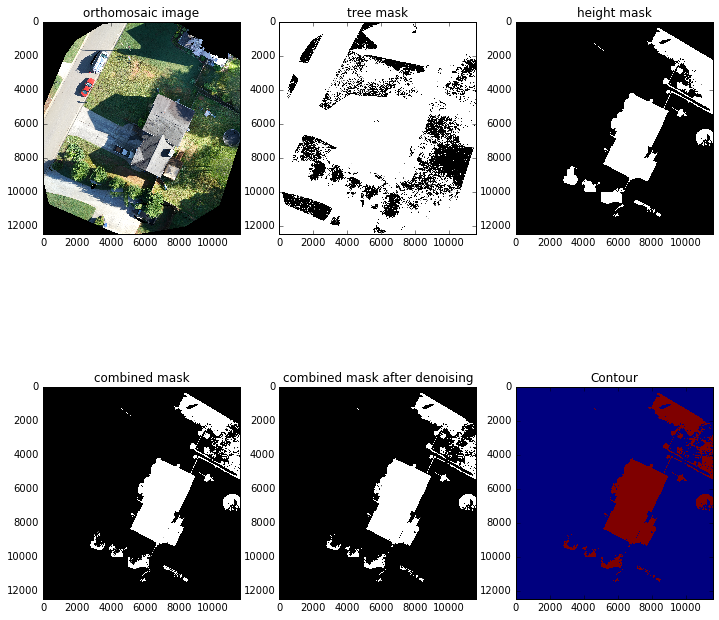

estimated area square feet is using height mask only is 
2646.3273839
seconds  120.521711826
actual roof sqft is: 1987.0
RMSE is: 659.327383898
perc_error: 0.331820525364
----computing the following house now: 5855a906-aefa-4ae0-be10-80aa587ee982
The number of pixels in the largest contour is: 13166335.0
The index of contour which is the largst is: 3


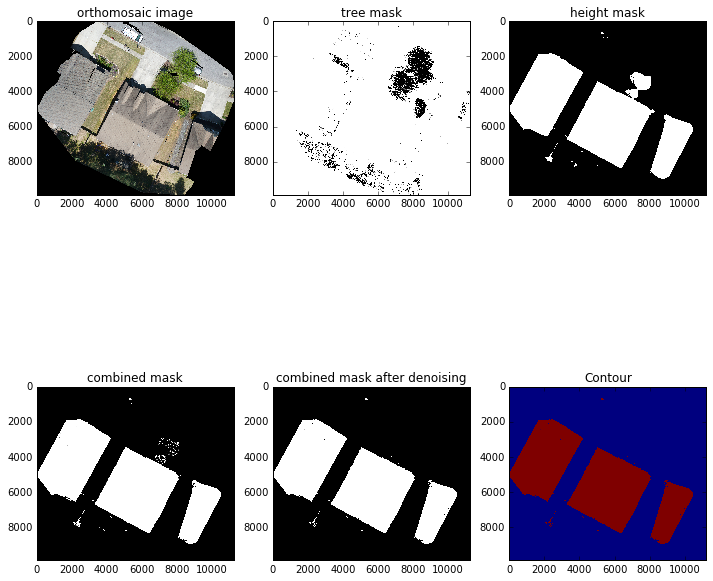

estimated area square feet is using height mask only is 
3556.10503502
seconds  79.0684030056
actual roof sqft is: 2920.0
RMSE is: 636.105035016
perc_error: 0.217844190074
----computing the following house now: 989f9066-5eec-4d2e-b684-c631a9937243
The number of pixels in the largest contour is: 13121833.5
The index of contour which is the largst is: 16


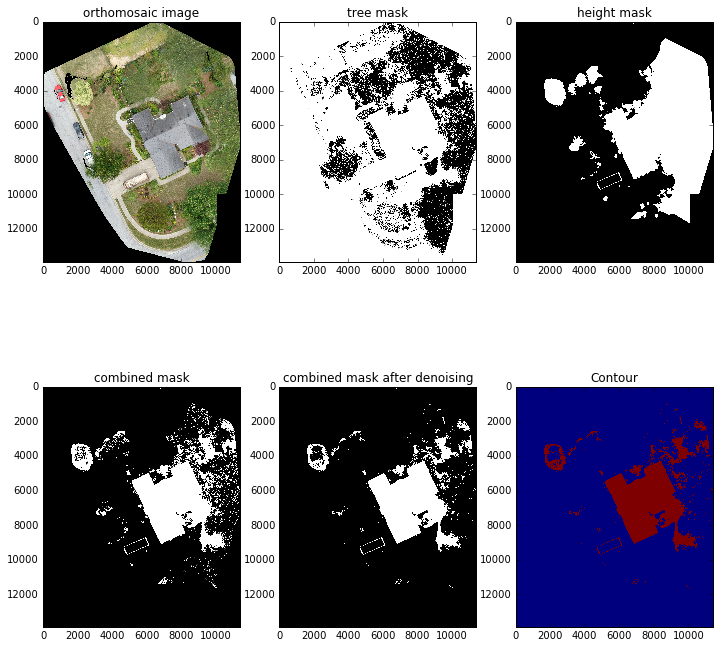

estimated area square feet is using height mask only is 
4079.59429382
seconds  135.048038006
actual roof sqft is: 2894.0
RMSE is: 1185.59429382
perc_error: 0.409673218322
----computing the following house now: a111a354-2b38-4f9f-a3c8-23dccec3e4e6
The number of pixels in the largest contour is: 15403029.0
The index of contour which is the largst is: 16


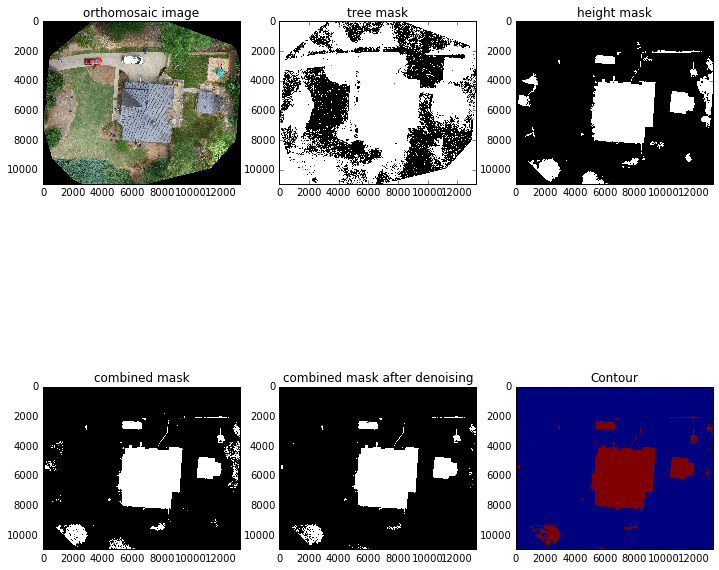

estimated area square feet is using height mask only is 
3419.42368728
seconds  120.518743992
actual roof sqft is: 3036.0
RMSE is: 383.423687276
perc_error: 0.126292387113
----computing the following house now: a1ae3f44-5878-4d30-898d-4dd4b33f8cfa
The number of pixels in the largest contour is: 15745696.0
The index of contour which is the largst is: 8


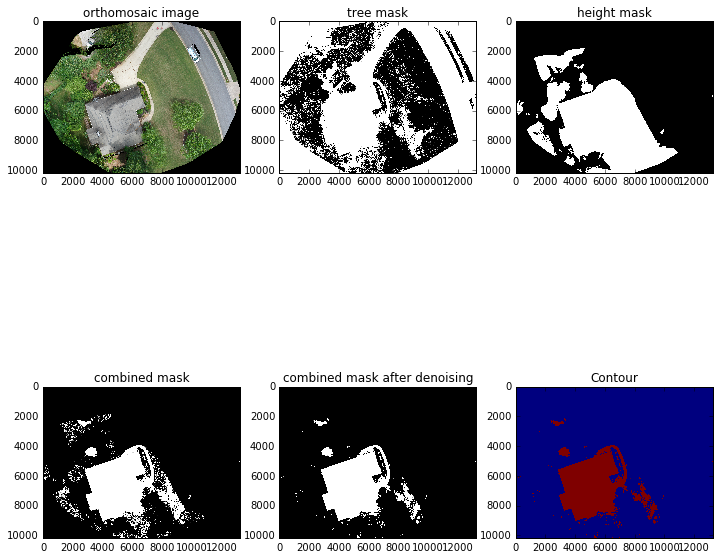

estimated area square feet is using height mask only is 
5472.69426156
seconds  102.570044041
actual roof sqft is: 4358.0
RMSE is: 1114.69426156
perc_error: 0.255781152263
----computing the following house now: ae7a28a6-02bc-4fa6-858b-ab1a6dc5a99f
The number of pixels in the largest contour is: 9791599.5
The index of contour which is the largst is: 1


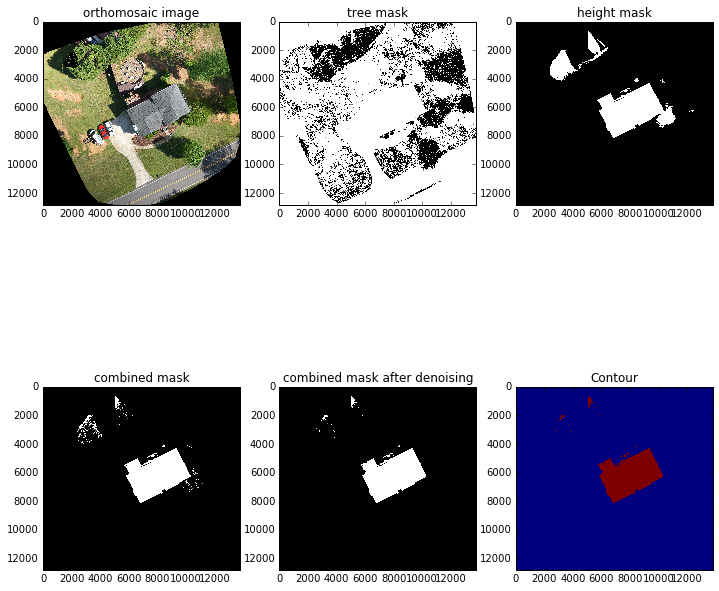

estimated area square feet is using height mask only is 
2705.20524205
seconds  149.48211813
actual roof sqft is: 2240.0
RMSE is: 465.205242052
perc_error: 0.20768091163
----computing the following house now: b718aabc-6b8a-42c9-920e-3378addd5810-P
The number of pixels in the largest contour is: 10092876.5
The index of contour which is the largst is: 14


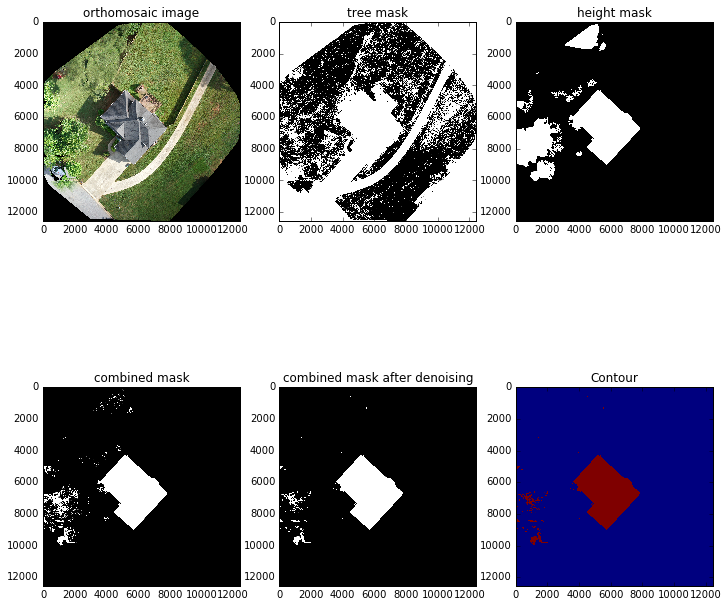

estimated area square feet is using height mask only is 
3071.61960663
seconds  124.361637831
actual roof sqft is: 2947.0
RMSE is: 124.619606634
perc_error: 0.0422869381179
----computing the following house now: b817e6c4-4176-4211-a5c8-77b54fe2e04e
The number of pixels in the largest contour is: 26902939.0
The index of contour which is the largst is: 22


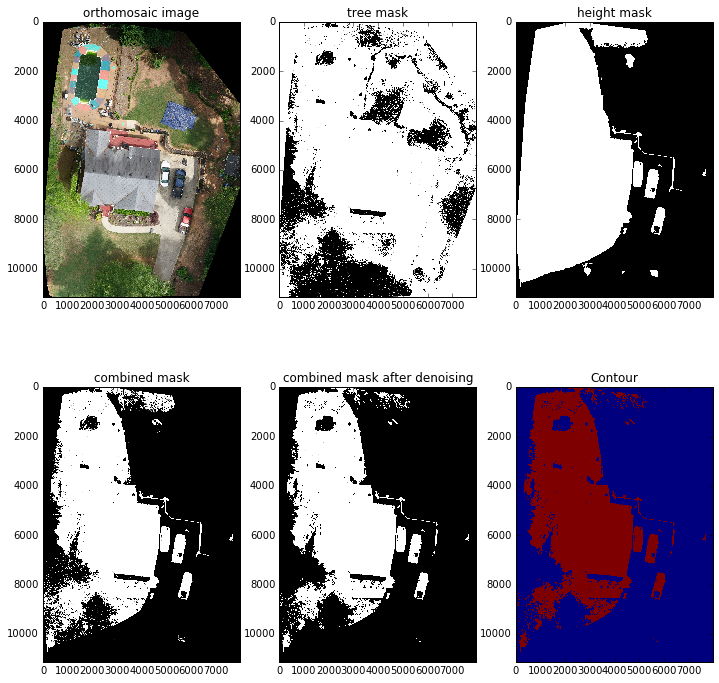

estimated area square feet is using height mask only is 
8686.86035842
seconds  63.8163700104
actual roof sqft is: 2398.0
RMSE is: 6288.86035842
perc_error: 2.62254393595
----computing the following house now: ba9b993d-c107-451f-9ba2-c6c8a79a18a2
The number of pixels in the largest contour is: 12392043.0
The index of contour which is the largst is: 12


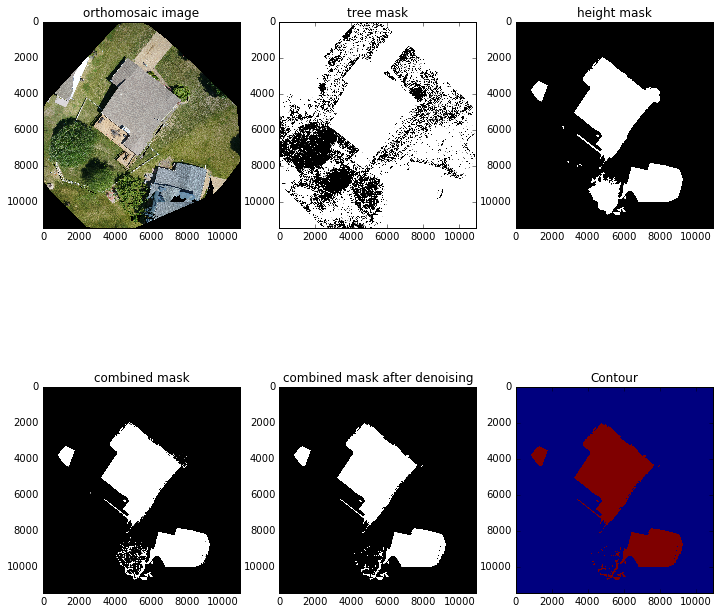

estimated area square feet is using height mask only is 
2890.97194092
seconds  91.3700931072
actual roof sqft is: 2390.0
RMSE is: 500.971940918
perc_error: 0.20961169076
results saved to output.csv
in total takes the followig minutes to run 16.5564109166


In [1]:
"""
Author: Dingchao Zhang
Created: Aug 10, 2016
Script to estimate roof area using 2d data, manual Height masking, median filetering, etc.
This script is for running on EDGE NODE with opencv2
"""


import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import argparse
import gdal                     #part of gdal 1.11
from gdalconst import *         #part of gdal 1.11
import glob
import matplotlib.pyplot as plt
import csv
import time
%matplotlib inline

# MODE EDGE is on edgenode which has opencv2, MODE LOCAL is on local mac which has opencv3
if cv2.__version__[0] == '2':
	MODE = 'EDGE'
	
elif cv2.__version__[0] == '3':
	MODE = 'LOCAL'

# SET UP OS
if MODE == 'EDGE':
	os.chdir(r'/san-data/usecase/skyscout/ARI-HackWeek')
elif MODE == 'LOCAL':
	os.chdir(r'/Users/ejlq/Documents/ARI-HackWeek')

    
def read_projdsm(dsm):
    """
    Read dsm/project_dsm.tif and return project_dsm read as an array
    containing height info
    
    """
    
    geofile = gdal.Open(dsm,0)
    project_dsm_1 = geofile.GetRasterBand(1)
    project_dsm = project_dsm_1.ReadAsArray()
    
    return project_dsm,geofile

def load_orthomosaic(orthom):
    """
    Load orthomosaic file and return rgbArray
    """
    pixelimageDS = gdal.Open(orthom)
    pr_data = pixelimageDS.GetRasterBand(1)
    pg_data = pixelimageDS.GetRasterBand(2)
    pb_data = pixelimageDS.GetRasterBand(3)
    #pa_data = pixelimageDS.GetRasterBand(4)

    r_data = pr_data.ReadAsArray()
    g_data = pg_data.ReadAsArray()
    b_data = pb_data.ReadAsArray()
    #a_data = pa_data.ReadAsArray()

    rgbArray = np.dstack((r_data, g_data, b_data))
    return rgbArray

def hsv_mask(rgbArray):
    """
    Load rgbArray read from orthomosaic file and return a mask for filter green color points
    """
    hsv_rgb = cv2.cvtColor(rgbArray, cv2.COLOR_BGR2HSV)

    ## define range of green color in HSV    
    lower_rgb = np.array([65,20,20])
    upper_rgb = np.array([85,255,255])

    # Threshold the HSV image to create a mask for filter green color points
    mask_rgb= 255 - cv2.inRange(hsv_rgb, lower_rgb, upper_rgb)
    
    return mask_rgb



def height_mask(project_dsm,thresh = 3):
    """
    Load project_dsm and create height mask
    """
    mask_height = project_dsm > thresh
    mask_height = mask_height.astype(int)
    mask_height = cv2.convertScaleAbs(mask_height)
    
    return mask_height
    

def mask_add(mask_height,mask_rgb):
    """
    Combine color and height mask, denoise and return new masked project
    """
    
    ## Combine the tree mask with height mask
    mask_combined = cv2.bitwise_and(mask_height,mask_rgb)
    # Remove noises using open operation (Erosion followed by Dilation) to remove noises outside of the objects.
    kernel = np.ones((20,20),np.uint8)
    mask_denoise = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)
    return mask_denoise,mask_combined

def filtering(thresh1,filter_window = 151):
    """
    Apply Median Filter

    """    
    median = cv2.medianBlur(thresh1,filter_window)
    
    return median

def create_contours(median):

    """
    Find contours

    """
    mask = median.copy()
    if MODE == 'EDGE':
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    elif MODE == 'LOCAL':
        _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     contours, _ = cv2.findContours(median, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    return contours
#     _, contours, _ = cv2.findContours(median, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     return contours

def vis_imgprocess(rgbArray,mask_rgb,mask_height,mask_combined,mask_denoise,contours,index):

    """

    Gerenrates visualizations of the intermediate and final img processes

    """    

    #img_dummy = mask_denoise.copy()

    plt.figure(figsize=(12,12));
    plt.subplot(231), plt.imshow(rgbArray), plt.title('orthomosaic image') 
    plt.subplot(232), plt.imshow(mask_rgb,cmap='gray'), plt.title('tree mask')
    plt.subplot(233), plt.imshow(mask_height,cmap='gray'), plt.title('height mask')
    plt.subplot(234), plt.imshow(mask_combined,cmap='gray'), plt.title('combined mask')
    plt.subplot(235), plt.imshow(mask_denoise,cmap='gray'), plt.title('combined mask after denoising')

    
    # Tried the following to create individual contour, didn't work
    #cv2.drawContours(img_dummy, contours, index, (0, 255, 0), 3)
    cv2.drawContours(mask_denoise, contours, -1, (0, 255, 0), 3)
    plt.subplot(236), plt.imshow(mask_denoise), plt.title('Contour')
    plt.show()
    
    
def georef(geofile):
    """
    Get pixel width and height in meters

    """    
        
    geoTransf = geofile.GetGeoTransform()
    xOrigin = geoTransf[0]
    yOrigin = geoTransf[3]
    pixelWidth = abs(geoTransf[1])
    pixelHeight = abs(geoTransf[5])
    
    return pixelWidth,pixelHeight

def max_contour(contours):
    """
    find the largest contour, return its number of pixels and index
    
    """
    count,index = max([(cv2.contourArea(v),i) for i,v in enumerate(contours)])
    
    print 'The number of pixels in the largest contour is:', count
    print 'The index of contour which is the largst is:' , index
    
    return count,index
    
def compute_area_2d(contours,index,pixW = 0.00406,pixH = 0.00406,s2rRatio = 1.302):

    """

    Compute area using 2d info

    """ 
    ##DICTIONARY COMPREHENSION EFFICIENT
    
    #c,index = max([(cv2.contourArea(v),i) for i,v in enumerate(contours)])
    
    
    sqM2sqF = 10.7639
    #area = cv2.contourArea(cv2.convexHull(contours[index]))*pixW*pixH*s2rRatio*sqM2sqF
    area = cv2.contourArea(contours[index])*pixW*pixH*s2rRatio*sqM2sqF
    return area

def create_groundTruth(targetCSV):
    """
    Read ARI-target file, return a dictionary with key as house name, actual
    area as item
    
    """
    with open(targetCSV, mode='r') as infile:
        reader = csv.reader(infile)
#  with open('coors_new.csv', mode='w') as outfile:
#             writer = csv.writer(outfile)
        mydict = {rows[0]:rows[1] for rows in reader}
        
    return mydict
    
def evaluate(actual_dict,house,prediction):
    """
    Compute RMSE, perc_error
    """
    
    house = house +'.pdf'
    try:
        target = float(actual_dict[house])
    except:
        target = 999.12345
    RMSE = np.sqrt(np.mean((prediction-target)**2))
    perc_error = (prediction - target)/target
    print 'actual roof sqft is:', target
    print 'RMSE is:', RMSE
    print 'perc_error:', perc_error
    
    return target,RMSE,perc_error


    
def pipeline_height(dsm,orthom):
	"""
	 Pileline all processing functions together using height mask only
     filename: color_relief.tif
     dsm: project_dsm.tif
     now the order is apply height mask then rgb mask
     good to try a different order --TODO!!
     
	"""
	start_time = time.time()

	# Load project_dsm and orthmosaic files
	project_dsm,geofile = read_projdsm(dsm)
	rgbArray = load_orthomosaic(orthom)

	# Create masks and return masked project
	mask_rgb = hsv_mask(rgbArray)
	mask_height = height_mask(project_dsm)
	mask_denoise,mask_combined = mask_add(mask_height,mask_rgb)
	median = filtering(mask_denoise)
	# Find contours and return the largest one
	contours = create_contours(median) 
	c,index = max_contour(contours) 

	# Predict roof area
	pixW,pixH = georef(geofile) # get pixel width and height in meters
	areaEst = compute_area_2d(contours,index,pixW = pixW,pixH = pixH)
	vis_imgprocess(rgbArray,mask_rgb,mask_height,mask_combined,mask_denoise,contours,index) # visualize

    ###
    ###The following lines of code adjust height threshold based on the estimated area of first round
    ###and re-estimate roof square feet
    
	if areaEst < 900:
		mask_height = height_mask(project_dsm,thresh = 3)
		mask_denoise,mask_combined = mask_add(mask_height,mask_rgb)
		median = filtering(mask_denoise)
		# Find contours and return the largest one
		contours = create_contours(median) 
		c,index = max_contour(contours) 

	# Predict roof area
		pixW,pixH = georef(geofile) # get pixel width and height in meters
		areaEst = compute_area_2d(contours,index,pixW = pixW,pixH = pixH)
		vis_imgprocess(rgbArray,mask_rgb,mask_height,mask_combined,mask_denoise,contours,index) # visualize

	elif areaEst > 10000:
		mask_height = height_mask(project_dsm,thresh = 8)
		mask_denoise,mask_combined = mask_add(mask_height,mask_rgb)
		median = filtering(mask_denoise)
		# Find contours and return the largest one
		contours = create_contours(median) 
		c,index = max_contour(contours) 

	# Predict roof area
		pixW,pixH = georef(geofile) # get pixel width and height in meters
		areaEst = compute_area_2d(contours,index,pixW = pixW,pixH = pixH)
		vis_imgprocess(rgbArray,mask_rgb,mask_height,mask_combined,mask_denoise,contours,index) # visualize

        
	exe_time = time.time() - start_time
	print "estimated area square feet is using height mask only is \n", areaEst
	print "seconds ",exe_time
	return areaEst,exe_time
	
    
    
    
    
def main():  
    start_time = time.time()
    
    	
    if MODE == 'LOCAL':
    	rootdir = '/Users/ejlq/Documents/ARI-HackWeek/training/'
    	target_dict = create_groundTruth('ARI-targets.csv')
    elif MODE == 'EDGE':
    	rootdir = '/san-data/usecase/skyscout/ARI-HackWeek/training/'
    	target_dict = create_groundTruth('/home/ejlq/ARI-targets.csv')
    results = []
    
    files = [x for x in os.listdir(rootdir) if not x.startswith('.')]
    
    for f in files:
            
        result = []
        dsm = rootdir + f + '/dsm/project_dsm.tif'
        orthom = rootdir + f + '/orthomosaic_rgb/project_transparent_mosaic_rgb.tif'
        
        print '----computing the following house now:' , f

            
        est, exe_time= pipeline_height(dsm,orthom)
#         try:
#         	est, exe_time= pipeline_height(dsm,orthom)
#         except:
#         	est, exe_time = 2700, 10000
#         	print 'estimation error out'
        target,RMSE,perc_error = evaluate(target_dict,f,est)
            
        result.append(f)
        result.extend([est,target,exe_time,RMSE,perc_error])
        results.append(result)

    
    if MODE == 'LOCAL' :
       
    	with open("output2.csv", "wb") as f:
    		writer = csv.writer(f)
    		writer.writerow(['House','Predicted','Target','Exe_time','RMSE','Perc_error'])
    		writer.writerows(results)
    elif MODE == 'EDGE' :
        os.chdir('/home/ejlq/hackweek/output/')
    	with open("output.csv", "wb") as f:
    		writer = csv.writer(f)
    		writer.writerow(['House','Predicted','Target','Exe_time','RMSE','Perc_error'])
    		writer.writerows(results)
        
    print 'results saved to output.csv'
    print 'in total takes the followig minutes to run', (time.time() - start_time)/60
    return results
        
                

if __name__ == '__main__':
    main()